# Actividad 02: Librerías y Modelamiento Básico
## Métodos Computacionales

## Soleil Dayana Niño Murcia 1033097666

In [27]:
import numpy as np
import matplotlib.pyplot as plt

## 1.
Una persona conduce una moto con rapidez constante Vm
, mientras que un policia lo hace con aceleración constante Ap (iniciando desde el reposo). Suponga que ambos movimientos inician en t=0, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante t en el cual se encuentran ambos. Ambos movimientos iniciarán en Xi = 0.
Pruebe: para Vm = 15m/s y Ap = 3 m/s², el tiempo deberia ser 10 s.

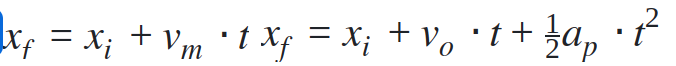

In [ ]:
vm, ap = int(input('Ingrese la velocidad de la moto:  ')), int(input('Ingrese la aceleración del policía (debe ser diferente a 0):  '))

Ingrese la velocidad de la moto:15
Ingrese la aceleración del policía (debe ser diferente a 0):3


In [ ]:
#Al igualar las ecuaciones sabiendo que la posición inicial es 0, se obtiene al despejar t de la forma:
t = 2*vm/ap
print('El punto de encuentro se da en el segundo ', t, '.')

El punto de encuentro se da a  10.0 segundos.


In [ ]:
time = np.linspace(0,t+0.2*t,500)
x_m = vm* time #posición persona
x_t = ap/2*(time**2) #posición policía

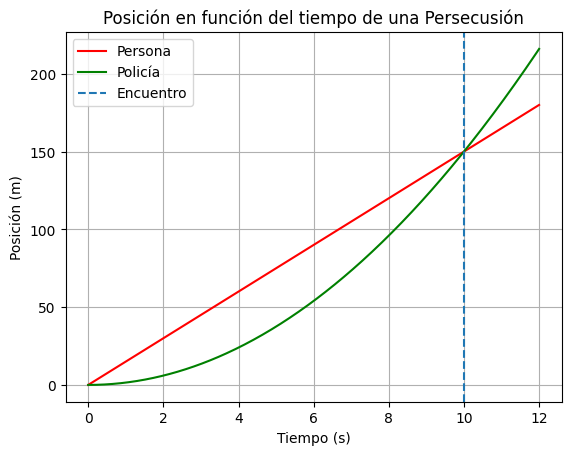

In [ ]:
plt.plot(time, x_m, 'r', label = 'Persona')
plt.plot(time, x_t,'g', label = 'Policía')
plt.axvline(t, linestyle = '--', label = 'Encuentro')
plt.legend()
plt.title('Posición en función del tiempo de una Persecusión')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.grid()

## 2. El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:
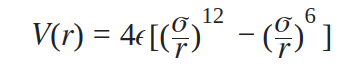

Donde:

$ V(r) $ es el potencial en función de la distancia interatómica $ r $.

$ \epsilon $ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.

$ \sigma $ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.

$ r $ es la distancia entre las dos partículas.

### a. Escriba una función para encontrar modelar el potencial LJ.

In [28]:
def LJ_potential(r, epsilon, sigma):
  a = (sigma/r)**12
  b = (sigma/r)**6
  Vr = 4*epsilon*(a-b)
  return Vr


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/16}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


In [37]:
sigma = 1
epsilon = 1

rc = 2.5

a = 2**(1/16)*sigma
print('La distancia de equilibrio es: ', a, '. Note que esto se evidencia en la siguiente gráfica.')

La distancia de equilibrio es:  1.0442737824274138 . Note que esto se evidencia en la siguiente gráfica.


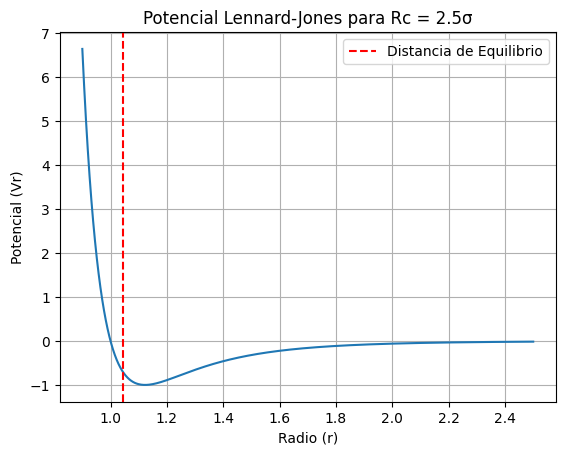

In [38]:
values = np.linspace(0.9, rc, 500)
potential = LJ_potential(values, sigma, epsilon)
plt.plot(values, potential)
plt.axvline(2**(1/16)*sigma, color = 'red', linestyle = '--', label = 'Distancia de Equilibrio')
plt.title('Potencial Lennard-Jones para Rc = 2.5σ')
plt.xlabel('Radio (r)')
plt.ylabel('Potencial (Vr)')
plt.grid()
plt.legend()

print('')

In [35]:
min = np.min(potential) #Encuentra el valor minimo de potencial
min_index = np.argmin(potential) #Halla el índice de dicho valor
r_min = values[min_index] #Encuentra el valor de radio en ese índice
print('El valor mínimo de potencial es ', min, 'que corresponde a un radio de', r_min)

El valor mínimo de potencial es  -0.999957177281658 que corresponde a un radio de 1.1212424849699398


c. Verifique que $r_m = 2^{1/16}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.

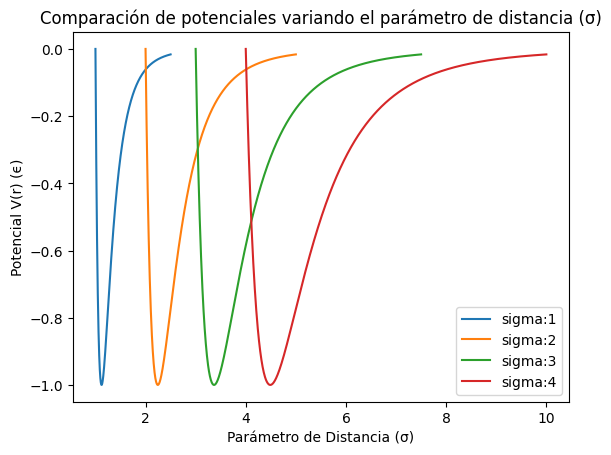

In [39]:
p_minimos = np.zeros(5)
for i in range(1,len(p_minimos)):
  sigma = i
  rc = 2.5*sigma
  values = np.linspace(sigma, rc, 1000)
  potencial = LJ_potential(values, epsilon, sigma)
  minimos_ = np.argmin(potencial)
  p_minimos[i] = values[minimos_]
  plt.plot(values,potencial, label = f'sigma:{i}')
  plt.title('Comparación de potenciales variando el parámetro de distancia (σ)')
  plt.xlabel('Parámetro de Distancia (σ)')
  plt.ylabel('Potencial V(r) (ϵ)')
  plt.legend()
  plt.grid()

El valor mínimo de potencial es independiente al parámetro de distancia, esto es bastante evidente en la gráfica. Para cualquier parámetro de distancia se cumple que $r_m = 2^{1/16}\sigma$ .

3.  El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres al español.



In [51]:
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country" #Pueden presentarse cambios en la base de datos del url que alteren el funcionamiento del códifgo (lo digo porque la primera vez que lo corrí no habían dos columnas que ahora unos días después aparecen)
html_content = pd.read_html(url)
alturas = html_content[2]

In [52]:
alturas.drop(['Boys 19 (in)', 'Girls 19 (in)'], axis=1, inplace = True) #Elimina las columnas indicadas
alturas = alturas.rename(columns = {"Country": "País", "Average Height, Boys, 19 yo (cm)": "Niños 19 (cm)", "Girls 19 (cm)": "Niñas 19 (cm)" , "Boys 15 (cm)": "Niños 15 (cm)" , "Girls 15 (cm)": "Niñas 15 (cm)" , "Boys 10 (cm)": "Niños 10 (cm)", "Girls 10 (cm)": "Niñas 10 (cm)" , "Boys 5 (cm)": "Niños 5 (cm)" , "Girls 5 (cm)": "Niñas 5 (cm)"})

In [53]:
alturas

País  Niños 19 (cm)  Niñas 19 (cm)  Niños 15 (cm)  \
0               Netherlands         183.78         170.36         177.20   
1                Montenegro         183.30         169.96         177.50   
2                   Estonia         182.79         168.66         176.41   
3    Bosnia and Herzegovina         182.47         167.47         174.21   
4                   Iceland         182.10         168.91         174.80   
..                      ...            ...            ...            ...   
191        Papua New Guinea         163.10         156.89         157.73   
192         Solomon Islands         163.07         156.79         159.48   
193                    Laos         162.78         153.10         159.43   
194             Timor Leste         160.13         152.71         154.15   
195                   Total         171.37         159.15         165.04   

     Niñas 15 (cm)  Niños 10 (cm)  Niñas 10 (cm)  Niños 5 (cm)  Niñas 5 (cm)  
0           167.45         146.88         146.55        119.63        118.45  
1           167.42         146.81         146.33        119.58        118.49  
2           166.12         146.03         145.21        116.94        115.74  
3           164.85         144.97         144.55        118.32        116.38  
4           165.61         145.59         145.06        118.49        116.48  
..             ...            ...            ...           ...           ...  
191         155.22         129.98         135.88        104.16        108.08  
192         154.16         131.86         134.06        105.48        105.70  
193         152.80         131.95         134.20        105.91        106.63  
194         150.11         125.94         131.02         99.62        103.98  
195         157.25         136.79         137.65        110.20        110.08  

[196 rows x 9 columns]


b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

In [54]:
mayores_b = alturas.nlargest(10, 'Niños 19 (cm)')
menores_b = alturas.nsmallest(10, 'Niños 19 (cm)')

mayores_g = alturas.nlargest(10, 'Niñas 19 (cm)')
menores_g = alturas.nsmallest(10, 'Niñas 19 (cm)')

colombia = alturas[alturas['País'] == 'Colombia']

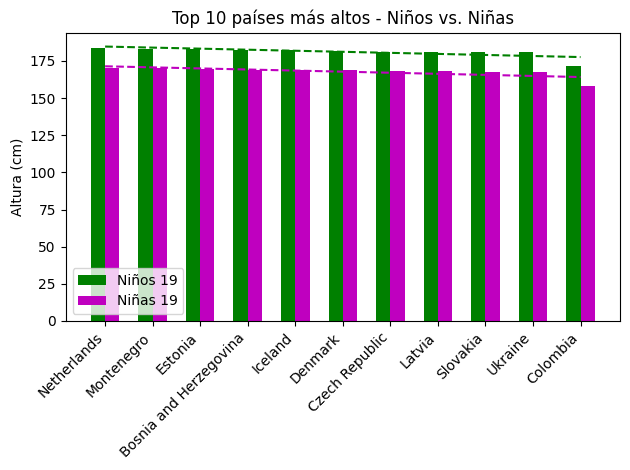

In [55]:
ninos = pd.concat([mayores_b['Niños 19 (cm)'], colombia['Niños 19 (cm)']])
ninas = pd.concat([mayores_g['Niñas 19 (cm)'], colombia['Niñas 19 (cm)']])
countries_labels = pd.concat([mayores_b['País'], colombia['País']])

x = np.arange(len(countries_labels))
width = 0.3  #ancho de barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ninos, width, label='Niños 19', color = 'g')
rects2 = ax.bar(x + width/2, ninas, width, label='Niñas 19', color = 'm')

ax.set_ylabel('Altura (cm)')
ax.set_title('Top 10 países más altos - Niños vs. Niñas')
ax.set_xticks(x)
ax.set_xticklabels(countries_labels, rotation=45, ha='right')
ax.legend()

z = np.polyfit(x, ninos, 1) #Línea de tendencia niños
p = np.poly1d(z)
plt.plot(x,p(x),"g--")

z = np.polyfit(x, ninas, 1) #Línea de tendencia niñas
p = np.poly1d(z)
plt.plot(x,p(x),"m--")

fig.tight_layout()
plt.show()

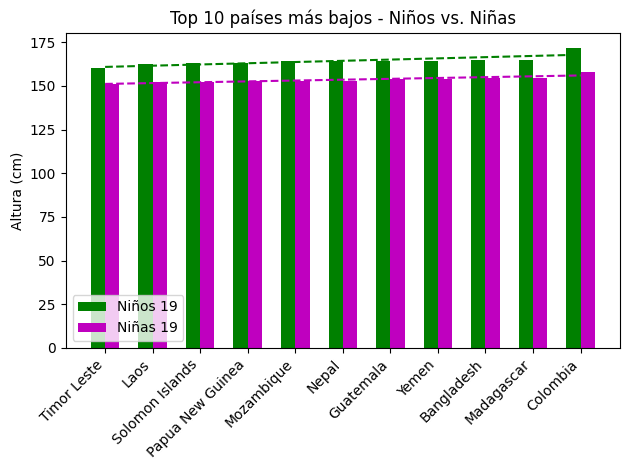

In [56]:
ninos = pd.concat([menores_b['Niños 19 (cm)'], colombia['Niños 19 (cm)']])
ninas = pd.concat([menores_g['Niñas 19 (cm)'], colombia['Niñas 19 (cm)']])
countries_labels = pd.concat([menores_b['País'], colombia['País']])

x = np.arange(len(countries_labels))
width = 0.3  #ancho de barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ninos, width, label='Niños 19', color = 'g')
rects2 = ax.bar(x + width/2, ninas, width, label='Niñas 19', color = 'm')

ax.set_ylabel('Altura (cm)')
ax.set_title('Top 10 países más bajos - Niños vs. Niñas')
ax.set_xticks(x)
ax.set_xticklabels(countries_labels, rotation=45, ha='right')
ax.legend()

z = np.polyfit(x, ninos, 1) #Línea de tendencia niños
p = np.poly1d(z)
plt.plot(x,p(x),"g--")

z = np.polyfit(x, ninas, 1) #Línea de tendencia niñas
p = np.poly1d(z)
plt.plot(x,p(x),"m--")

fig.tight_layout()
plt.show()

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 menores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.
Dataset 2
 URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````


In [58]:
url_2 = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"
html_content_2 = pd.read_html(url_2)
income = html_content_2[0]

In [59]:
# Renombra las columnas
income = income.rename(columns = {'Country':'País', 'Total Wealth (billions USD)' : 'Riqueza total (USD)' , 'GDP per Adult (USD)' : 'PIB por adulto (USD)', 'Wealth per Adult (USD)' : 'Riqueza por adulto (USD)', '	Share of World Wealth' : 'Participación de la riqueza mundial'})

In [63]:
income

País Riqueza total (USD) PIB por adulto (USD)  \
0     United States            $145,793              $91,340   
1             China             $85,107              $15,765   
2             Japan             $25,692              $45,449   
3           Germany             $17,489              $59,423   
4    United Kingdom             $16,261              $59,377   
..              ...                 ...                  ...   
211        Anguilla                 NaN              $26,510   
212    Cook Islands                 NaN              $26,438   
213           Nauru                 NaN              $23,398   
214          Tuvalu                 NaN               $7,780   
215      Montserrat                 NaN              $21,123   

    Riqueza por adulto (USD) Share of World Wealth  
0                   $579,051                31.45%  
1                    $76,639                18.36%  
2                   $245,238                 5.54%  
3                   $256,985                 3.77%  
4                   $309,375                 3.51%  
..                       ...                   ...  
211                      NaN                     -  
212                      NaN                     -  
213                      NaN                     -  
214                      NaN                     -  
215                      NaN                     -  

[216 rows x 5 columns]

In [64]:
# Combina los df
data = income.merge(alturas, how='inner', on='País')
data

País Riqueza total (USD) PIB por adulto (USD)  \
0               China             $85,107              $15,765   
1               Japan             $25,692              $45,449   
2             Germany             $17,489              $59,423   
3      United Kingdom             $16,261              $59,377   
4              France             $16,159              $56,125   
..                ...                 ...                  ...   
187  Marshall Islands                 NaN               $6,693   
188             Palau                 NaN              $19,451   
189      Cook Islands                 NaN              $26,438   
190             Nauru                 NaN              $23,398   
191            Tuvalu                 NaN               $7,780   

    Riqueza por adulto (USD) Share of World Wealth  Niños 19 (cm)  \
0                    $76,639                18.36%         175.66   
1                   $245,238                 5.54%         172.06   
2                   $256,985                 3.77%         180.28   
3                   $309,375                 3.51%         178.21   
4                   $322,074                 3.49%         178.60   
..                       ...                   ...            ...   
187                      NaN                     -         165.26   
188                      NaN                     -         170.62   
189                      NaN                     -         178.32   
190                      NaN                     -         169.57   
191                      NaN                     -         171.30   

     Niñas 19 (cm)  Niños 15 (cm)  Niñas 15 (cm)  Niños 10 (cm)  \
0           163.46         171.23         162.44         141.87   
1           158.50         168.80         158.08         139.06   
2           166.18         174.65         164.70         144.36   
3           163.94         172.44         162.92         142.39   
4           164.49         173.15         163.76         143.00   
..             ...            ...            ...            ...   
187         154.76         160.38         154.50         132.78   
188         159.52         167.60         159.53         140.11   
189         167.31         174.00         166.21         145.74   
190         157.82         166.63         157.12         139.30   
191         163.57         166.91         161.87         139.28   

     Niñas 10 (cm)  Niños 5 (cm)  Niñas 5 (cm)  
0           143.40        113.41        114.91  
1           139.68        109.84        109.28  
2           143.95        114.76        113.34  
3           142.58        112.54        111.73  
4           142.83        114.65        113.59  
..             ...           ...           ...  
187         136.59        106.98        109.10  
188         141.43        114.08        113.47  
189         146.12        119.25        117.87  
190         138.40        113.42        110.69  
191         142.45        113.02        114.45  

[192 rows x 13 columns]

In [65]:
# Crea un nuevo df con las columnas de interés
merge = data.loc[:, ['País', 'PIB por adulto (USD)', 'Niñas 19 (cm)']]
merge

País PIB por adulto (USD)  Niñas 19 (cm)
0               China              $15,765         163.46
1               Japan              $45,449         158.50
2             Germany              $59,423         166.18
3      United Kingdom              $59,377         163.94
4              France              $56,125         164.49
..                ...                  ...            ...
187  Marshall Islands               $6,693         154.76
188             Palau              $19,451         159.52
189      Cook Islands              $26,438         167.31
190             Nauru              $23,398         157.82
191            Tuvalu               $7,780         163.57

[192 rows x 3 columns]

In [66]:
# Elimina strings para poder tratar los valores como enteros
merge['PIB por adulto (USD)'] = merge['PIB por adulto (USD)'].str.replace('$', '').str.replace(',', '').astype(int)
merge

País  PIB por adulto (USD)  Niñas 19 (cm)
0               China                 15765         163.46
1               Japan                 45449         158.50
2             Germany                 59423         166.18
3      United Kingdom                 59377         163.94
4              France                 56125         164.49
..                ...                   ...            ...
187  Marshall Islands                  6693         154.76
188             Palau                 19451         159.52
189      Cook Islands                 26438         167.31
190             Nauru                 23398         157.82
191            Tuvalu                  7780         163.57

[192 rows x 3 columns]

In [67]:
# Creo un nuevo df con las alturas más bajas de las niñas de 19 y sus respectivos PIB según el país, y los ordena ascendentemente
pib_list = []
merge_ordered = menores_g.sort_values('Niñas 19 (cm)', ascending=True)[['País', 'Niñas 19 (cm)']]
paises_lista = merge_ordered['País'].tolist() # Lista para tomar etiquetas para gráfica
for pais in merge_ordered['País'].tolist():
    pib = merge[merge['País'] == pais]['PIB por adulto (USD)'].iloc[0]
    pib_list.append(pib)
merge_ordered['PIB por adulto (USD)'] = pib_list
merge_ordered

País  Niñas 19 (cm)  PIB por adulto (USD)
189    Guatemala         150.91                  8198
186   Bangladesh         152.38                  3333
188        Nepal         152.39                  1812
194  Timor Leste         152.71                  3336
185   Madagascar         153.06                   990
193         Laos         153.10                  4364
184  Philippines         154.14                  5580
164     Maldives         154.28                 12473
177    Indonesia         154.36                  6472
172         Peru         154.39                  9761

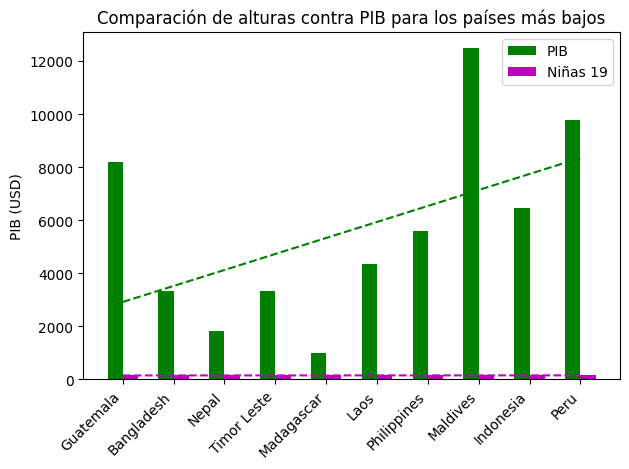

In [68]:
countries_labels = paises_lista
new_df = merge_ordered
ninas = new_df['Niñas 19 (cm)']

x = np.arange(len(paises_lista))
y = new_df['PIB por adulto (USD)']
width = 0.3  #ancho de barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, new_df['PIB por adulto (USD)'], width, label='PIB', color = 'g')
rects2 = ax.bar(x + width/2, ninas, width, label='Niñas 19', color = 'm')

ax.set_ylabel('PIB (USD)')
ax.set_title('Comparación de alturas contra PIB para los países más bajos')
ax.set_xticks(x)
ax.set_xticklabels(countries_labels, rotation=45, ha='right')
ax.legend()

z = np.polyfit(x, new_df['Niñas 19 (cm)'], 1) #Línea de tendencia niños
p = np.poly1d(z)
plt.plot(x,p(x),"m--")

z = np.polyfit(x, new_df['PIB por adulto (USD)'], 1) #Línea de tendencia PIB
p = np.poly1d(z)
plt.plot(x,p(x),"g--")

fig.tight_layout()
plt.show()

Según la gráfica, podría existir una relación entre la altura de los niños y el PIB, pues al ordenar los países en orden ascendente según su altura, tomando los 10 países con alturas más bajas, se observa una línea de tendencia del PIB que aumenta del mismo modo que la altura. Puede tener bastante dispersión la distribución respecto al ajuste lineal de la línea de tendencia, pero tomándolo a estos grandes rasgos, puede que sí aumente el PIB conforme aumenta la altura promedio de los niños del país.